# Exploration Data Analysis

This is the material I used to explore the dataset during my first week. It is based on Kaggle material:

* https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-5
* https://www.kaggle.com/sudalairajkumar/univariate-analysis-regression-lb-0-006
* https://www.kaggle.com/anokas/two-sigma-time-travel-eda
* https://www.kaggle.com/sankhamukherjee/when-why-are-stocks-bought-and-sold
* https://www.kaggle.com/sankhamukherjee/simple-exploration-of-y-values

You can find more interesting material here:

* https://www.kaggle.com/c/two-sigma-financial-modeling/kernels

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model
from datetime import timedelta

p = sns.color_palette()

import sys
sys.path.append("..") # Adds higher directory to python modules path.

from utils import *

In [2]:
df = pd.read_csv('../input/train.csv', index_col=0)
df_test = pd.read_csv('../input/test.csv', index_col=0)

In [3]:
print('Number of rows: {}, Number of columns: {}'.format(*df.shape))

Number of rows: 623817, Number of columns: 16


In [4]:
df.head()

,Market,Day,Stock,x0,x1,x2,x3A,x3B,x3C,x3D,x3E,x4,x5,x6,y,Weight
Index,,,,,,,,,,,,,,,,
0,1,1,363,0.002696,0.530040,0.400810,1.300048e-06,4.639533e-06,1.073594e-05,2.180516e-05,4.416943e-05,0.002212,6.214737e-07,200.000000,-0.000196,1.533780
1,1,1,1223,0.081093,1.366218,1.325157,1.656861e-05,3.024668e-05,5.261872e-05,4.193762e-05,4.193762e-05,0.010932,3.414868e-05,300.000000,-0.003798,0.843604
2,1,1,1372,0.009561,0.464871,0.328008,6.500872e-08,2.323204e-07,5.182686e-07,1.080834e-06,2.030442e-06,0.000306,4.079460e-08,159.692076,-0.000003,29.824024
3,1,1,1942,0.045300,0.608222,0.456662,1.928694e-08,6.495275e-08,1.338509e-07,2.644214e-07,6.980798e-07,0.000205,9.502066e-09,212.160378,-0.000008,100.388668
4,1,1,2712,0.001605,0.476718,0.205069,6.759866e-07,2.638783e-06,6.424519e-06,1.189923e-05,2.064450e-05,0.001525,3.428403e-07,153.724351,0.000065,5.950714


# Add Feature: Dates

In [5]:
df['Date'] = pd.to_datetime("'2015-10-01'") # assumption
df['Date'] = df['Date'] + df['Day'].map(timedelta) - timedelta(days=1)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.weekofyear
df['Weekday'] = df['Date'].dt.weekday
df['DayMonth'] = df['Date'].dt.day

In [6]:
df.head()

,Market,Day,Stock,x0,x1,x2,x3A,x3B,x3C,x3D,...,x5,x6,y,Weight,Date,Year,Month,Week,Weekday,DayMonth
Index,,,,,,,,,,,,,,,,,,,,,
0,1,1,363,0.002696,0.530040,0.400810,1.300048e-06,4.639533e-06,1.073594e-05,2.180516e-05,...,6.214737e-07,200.000000,-0.000196,1.533780,2015-10-01,2015,10,40,3,1
1,1,1,1223,0.081093,1.366218,1.325157,1.656861e-05,3.024668e-05,5.261872e-05,4.193762e-05,...,3.414868e-05,300.000000,-0.003798,0.843604,2015-10-01,2015,10,40,3,1
2,1,1,1372,0.009561,0.464871,0.328008,6.500872e-08,2.323204e-07,5.182686e-07,1.080834e-06,...,4.079460e-08,159.692076,-0.000003,29.824024,2015-10-01,2015,10,40,3,1
3,1,1,1942,0.045300,0.608222,0.456662,1.928694e-08,6.495275e-08,1.338509e-07,2.644214e-07,...,9.502066e-09,212.160378,-0.000008,100.388668,2015-10-01,2015,10,40,3,1
4,1,1,2712,0.001605,0.476718,0.205069,6.759866e-07,2.638783e-06,6.424519e-06,1.189923e-05,...,3.428403e-07,153.724351,0.000065,5.950714,2015-10-01,2015,10,40,3,1


In [7]:
df.tail()

,Market,Day,Stock,x0,x1,x2,x3A,x3B,x3C,x3D,...,x5,x6,y,Weight,Date,Year,Month,Week,Weekday,DayMonth
Index,,,,,,,,,,,,,,,,,,,,,
623812,4,729,561,0.000310,1.209313,0.931494,9.779300e-07,0.000003,0.000005,0.000004,...,0.000001,110.0,-0.000082,1.026946,2017-09-28,2017,9,39,3,28
623813,4,729,2710,0.003219,1.487954,0.754387,6.521731e-06,0.000009,0.000018,0.000019,...,0.000003,84.0,0.001125,0.604925,2017-09-28,2017,9,39,3,28
623814,4,729,1213,0.001703,1.310843,2.173269,9.085239e-07,0.000003,0.000007,0.000006,...,0.000004,86.0,0.001554,0.645594,2017-09-28,2017,9,39,3,28
623815,4,729,2458,0.011444,6.146195,5.445296,1.911068e-05,0.000067,0.000176,0.000283,...,0.000020,120.0,0.008505,0.501090,2017-09-28,2017,9,39,3,28
623816,4,729,2733,0.063936,1.885682,2.179460,7.509313e-06,0.000021,0.000049,0.000126,...,0.000020,100.0,-0.000113,2.578391,2017-09-28,2017,9,39,3,28


In [8]:
list(df.columns)

['Market',
 'Day',
 'Stock',
 'x0',
 'x1',
 'x2',
 'x3A',
 'x3B',
 'x3C',
 'x3D',
 'x3E',
 'x4',
 'x5',
 'x6',
 'y',
 'Weight',
 'Date',
 'Year',
 'Month',
 'Week',
 'Weekday',
 'DayMonth']

# Check NaNs values

In [9]:
df.isnull().sum()

Market       0
Day          0
Stock        0
x0           0
x1          55
x2           5
x3A          0
x3B          0
x3C          0
x3D          0
x3E          0
x4           0
x5           0
x6           0
y            0
Weight       0
Date         0
Year         0
Month        0
Week         0
Weekday      0
DayMonth     0
dtype: int64

In [10]:
df.describe()

,Market,Day,Stock,x0,x1,x2,x3A,x3B,x3C,x3D,...,x4,x5,x6,y,Weight,Year,Month,Week,Weekday,DayMonth
count,623817.000000,623817.000000,623817.000000,6.238170e+05,623762.000000,623812.000000,6.238170e+05,6.238170e+05,623817.000000,623817.000000,...,623817.000000,6.238170e+05,623817.000000,623817.000000,623817.000000,623817.000000,623817.000000,623817.000000,623817.000000,623817.000000
mean,2.611854,343.908465,1504.311899,3.513422e+01,1.515302,0.975639,3.569196e-06,7.650938e-06,0.000013,0.000020,...,0.001772,5.257464e-06,275.436028,0.000075,14.723355,2016.176781,6.662428,27.301164,1.955198,15.191561
std,0.816069,209.625123,874.545393,7.673634e+03,4.594337,2.498639,5.585191e-05,1.104701e-04,0.000196,0.000355,...,0.002313,8.692817e-05,1799.850048,0.001047,24.390745,0.654034,3.492843,15.472161,1.369879,8.830909
min,1.000000,1.000000,0.000000,0.000000e+00,0.000013,0.000313,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000005,0.000000e+00,1.000000,-0.071099,0.002797,2015.000000,1.000000,1.000000,0.000000,1.000000
25%,2.000000,161.000000,746.000000,2.038527e-03,0.701935,0.392679,2.262748e-07,6.104431e-07,0.000001,0.000002,...,0.000544,1.501948e-07,100.000000,-0.000107,2.271488,2016.000000,4.000000,14.000000,1.000000,8.000000
50%,3.000000,334.000000,1508.000000,1.095818e-02,1.040783,0.625408,6.904246e-07,1.789302e-06,0.000003,0.000006,...,0.001056,5.696645e-07,100.000000,0.000027,6.144597,2016.000000,7.000000,27.000000,2.000000,15.000000
75%,3.000000,518.000000,2264.000000,4.378452e-02,1.650996,0.992129,2.355756e-06,5.706755e-06,0.000010,0.000016,...,0.002131,2.338320e-06,200.000000,0.000203,16.649687,2017.000000,10.000000,41.000000,3.000000,22.000000
max,4.000000,729.000000,3022.000000,4.998275e+06,2946.263900,677.912473,2.831509e-02,6.514162e-02,0.109440,0.206560,...,0.102200,3.589258e-02,734914.404967,0.066617,694.001930,2017.000000,12.000000,53.000000,4.000000,31.000000


In [11]:
# Fill NaNs values by stock
df = fillna_bystock(df)
df.isnull().sum()

Market      0
Day         0
Stock       0
x0          0
x1          0
x2          0
x3A         0
x3B         0
x3C         0
x3D         0
x3E         0
x4          0
x5          0
x6          0
y           0
Weight      0
Date        0
Year        0
Month       0
Week        0
Weekday     0
DayMonth    0
dtype: int64

# Univariate Analysis

Let us look at the correlation of each of the variables with the target variables to get some important variables to be used for our next steps.

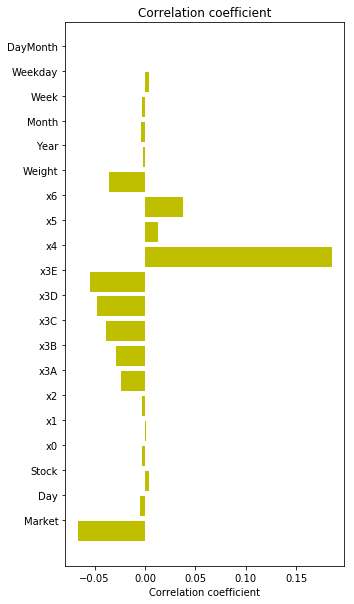

In [12]:
# Now let us look at the correlation coefficient of each of these variables
x_cols = [col for col in df.columns if col not in ['id','Date','y']]

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(df[col].values, df.y.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(5,10))
rects = ax.barh(ind, np.array(values), color='y')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient")
#autolabel(rects)
plt.show()

Wow x4 column looks like amazing! Later we will continue exploring this column!

Now, let us get the correlation coefficient in between the variables.

In [13]:
df.head()

,Market,Day,Stock,x0,x1,x2,x3A,x3B,x3C,x3D,...,x5,x6,y,Weight,Date,Year,Month,Week,Weekday,DayMonth
Index,,,,,,,,,,,,,,,,,,,,,
0,1,1,363,0.002696,0.530040,0.400810,1.300048e-06,4.639533e-06,1.073594e-05,2.180516e-05,...,6.214737e-07,200.000000,-0.000196,1.533780,2015-10-01,2015,10,40,3,1
1,1,1,1223,0.081093,1.366218,1.325157,1.656861e-05,3.024668e-05,5.261872e-05,4.193762e-05,...,3.414868e-05,300.000000,-0.003798,0.843604,2015-10-01,2015,10,40,3,1
2,1,1,1372,0.009561,0.464871,0.328008,6.500872e-08,2.323204e-07,5.182686e-07,1.080834e-06,...,4.079460e-08,159.692076,-0.000003,29.824024,2015-10-01,2015,10,40,3,1
3,1,1,1942,0.045300,0.608222,0.456662,1.928694e-08,6.495275e-08,1.338509e-07,2.644214e-07,...,9.502066e-09,212.160378,-0.000008,100.388668,2015-10-01,2015,10,40,3,1
4,1,1,2712,0.001605,0.476718,0.205069,6.759866e-07,2.638783e-06,6.424519e-06,1.189923e-05,...,3.428403e-07,153.724351,0.000065,5.950714,2015-10-01,2015,10,40,3,1


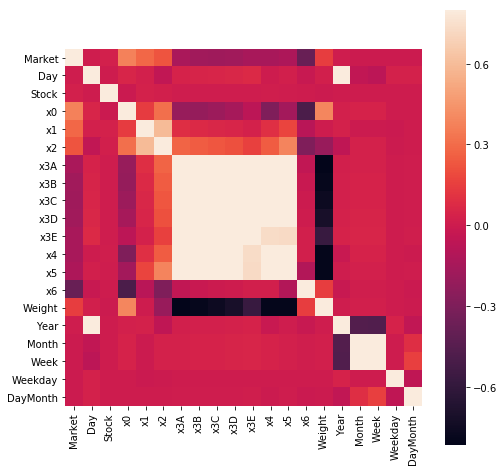

In [14]:
corrmat = df[x_cols].corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

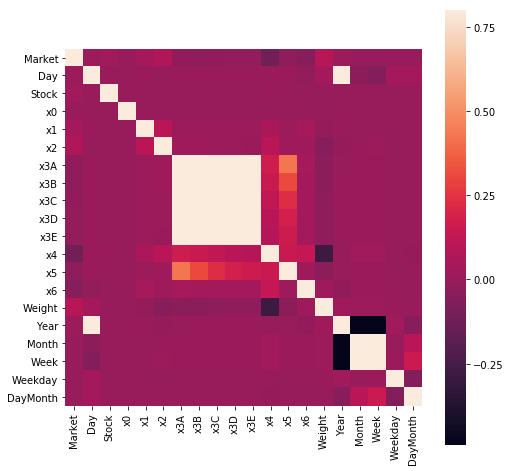

In [15]:
corrmat = df[x_cols].corr(method='pearson')
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

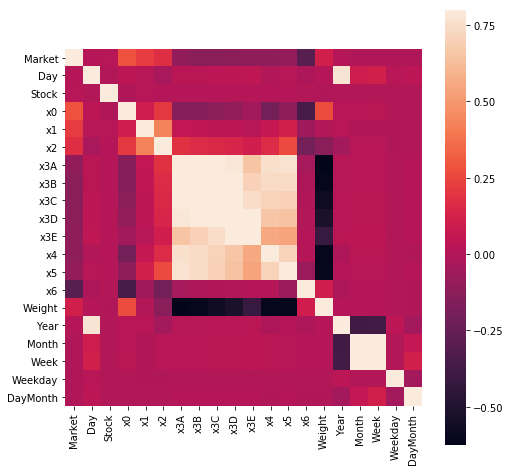

In [16]:
corrmat = df[x_cols].corr(method='kendall')
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

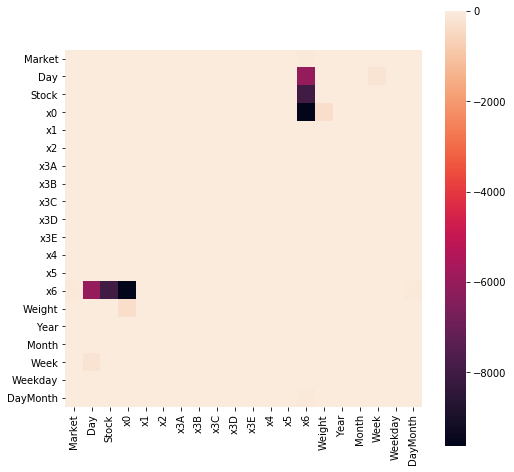

In [17]:
covmat = df[x_cols].cov()
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(covmat, vmax=.8, square=True)
plt.show()

Amazing, there is a some relation between x3 features, x4 and x5!

# Exploring Dates

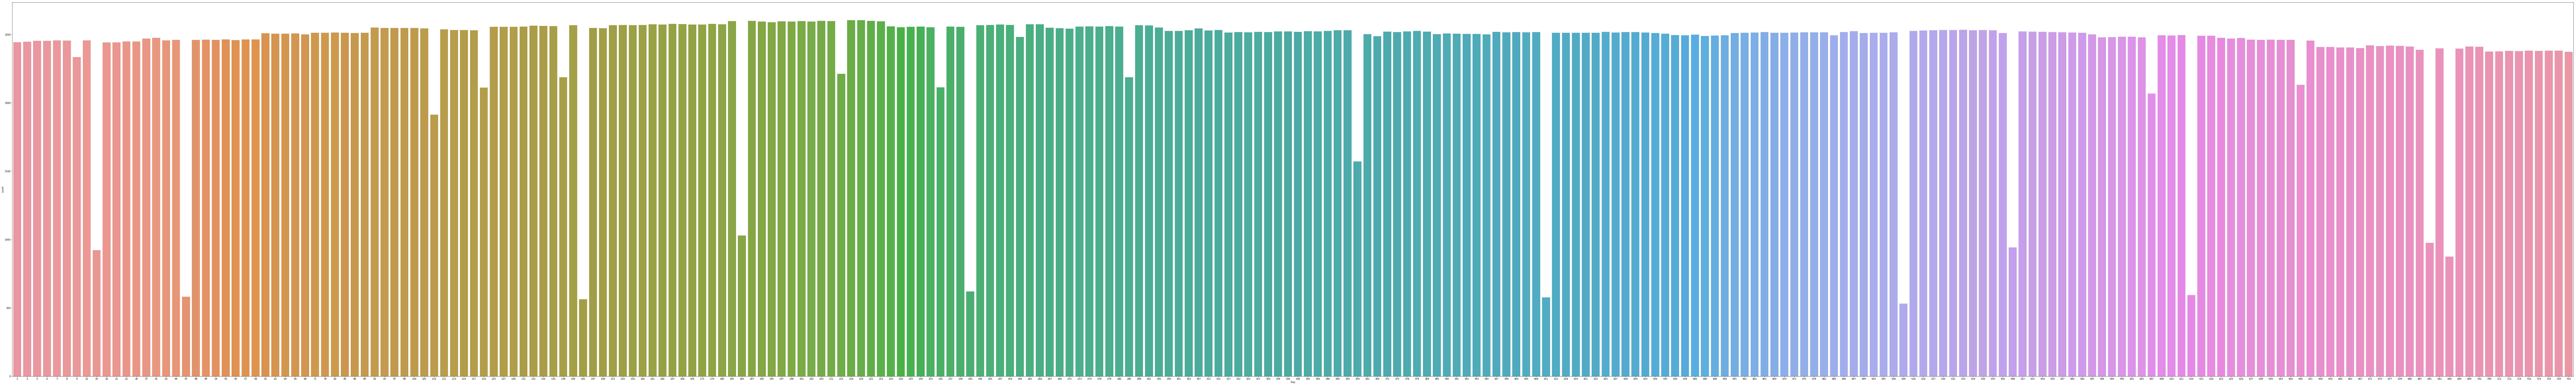

In [18]:
fig = plt.figure(figsize=(200, 30))
sns.countplot(x='Day', data=df)
plt.show()

In [19]:
# Number of stocks
print(len(df.Stock.unique()))

3022


In [20]:
# Number of days
print(len(df.Day.unique()))

258


3022*258 = 779676

But, we have only 623817 rows. So, somedays we have not data of certain stocks.

In [21]:
np.sort(df.Day.unique())

array([  1,   2,   5,   6,   7,   8,   9,  12,  19,  20,  21,  22,  30,
        37,  41,  43,  44,  47,  48,  49,  54,  55,  56,  57,  58,  61,
        62,  64,  65,  68,  71,  78,  82,  85,  86,  89,  92,  93,  97,
        98, 104, 105, 110, 111, 113, 114, 117, 124, 125, 127, 128, 131,
       132, 134, 135, 138, 140, 145, 147, 148, 153, 154, 156, 160, 161,
       166, 167, 168, 169, 173, 174, 180, 183, 184, 187, 190, 195, 197,
       198, 201, 202, 203, 211, 215, 216, 219, 222, 223, 225, 226, 229,
       230, 233, 236, 237, 238, 243, 244, 245, 247, 254, 264, 265, 266,
       267, 268, 272, 273, 274, 278, 279, 280, 285, 288, 292, 295, 299,
       301, 303, 307, 313, 315, 317, 322, 323, 327, 329, 334, 336, 338,
       343, 344, 348, 349, 350, 359, 362, 364, 371, 372, 378, 379, 384,
       385, 390, 391, 392, 393, 394, 397, 399, 404, 405, 408, 411, 412,
       418, 419, 421, 422, 425, 427, 428, 429, 433, 434, 435, 436, 439,
       440, 446, 448, 449, 455, 461, 462, 463, 469, 470, 471, 47

In [22]:
np.sort(np.append(df.Day.unique(), df_test.Day.unique()))

array([  1,   2,   5,   6,   7,   8,   9,  12,  13,  14,  15,  16,  19,
        20,  21,  22,  23,  26,  27,  28,  29,  30,  33,  34,  35,  36,
        37,  40,  41,  42,  43,  44,  47,  48,  49,  50,  51,  54,  55,
        56,  57,  58,  61,  62,  63,  64,  65,  68,  69,  70,  71,  72,
        75,  76,  77,  78,  79,  82,  83,  84,  85,  86,  89,  90,  91,
        92,  93,  96,  97,  98,  99, 100, 103, 104, 105, 106, 110, 111,
       112, 113, 114, 117, 118, 119, 120, 121, 124, 125, 126, 127, 128,
       131, 132, 133, 134, 135, 138, 139, 140, 141, 142, 145, 146, 147,
       148, 149, 152, 153, 154, 155, 156, 159, 160, 161, 162, 163, 166,
       167, 168, 169, 170, 173, 174, 175, 176, 177, 180, 181, 182, 183,
       184, 187, 188, 189, 190, 191, 194, 195, 196, 197, 198, 201, 202,
       203, 204, 205, 208, 209, 210, 211, 212, 215, 216, 217, 218, 219,
       222, 223, 224, 225, 226, 229, 230, 231, 232, 233, 236, 237, 238,
       239, 240, 243, 244, 245, 246, 247, 250, 251, 252, 253, 25

We can suppose that every row match with a day, so the gaps correspond to weekends and bank holidays...

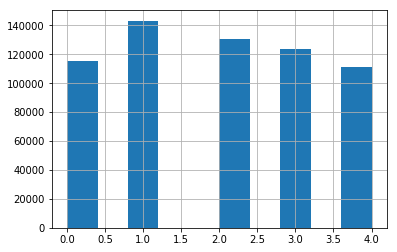

In [23]:
df['Weekday'].hist()

As a curiosity, the Tuesday is the day with more rows in the dataset. Saturday or Sunday haven't got any rows.

# Target: y

In [24]:
print('Target y: oscillate between {} and {}'.format(df.y.min(), df.y.max()))

Target y: oscillate between -0.071098947020338 and 0.06661666666792901


Target value min -0.071 max 0.067 mean 0.000 std 0.001


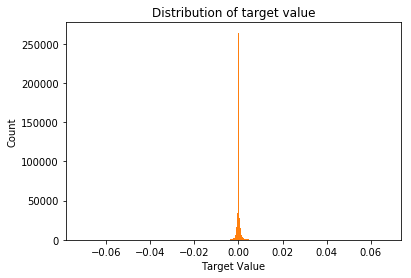

In [25]:
y = df['y'].values
plt.hist(y, bins=500, color=p[1])
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.title('Distribution of target value')
print('Target value min {0:.3f} max {1:.3f} mean {2:.3f} std {3:.3f}'.format(np.min(y), np.max(y), np.mean(y), np.std(y)))

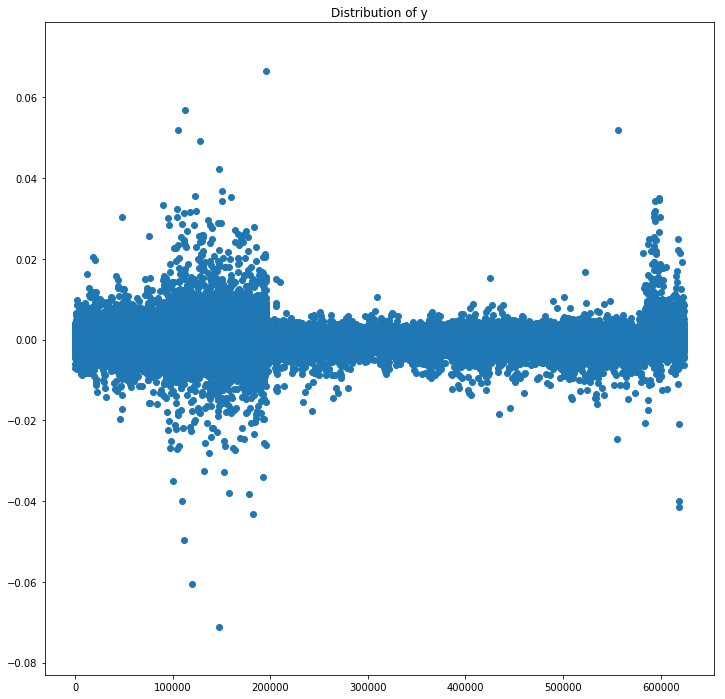

In [26]:
plt.figure(figsize=(12, 12))
plt.scatter(range(df.shape[0]), df.y.values)
plt.title("Distribution of y")
plt.show()

Example of y values to 100 different stocks

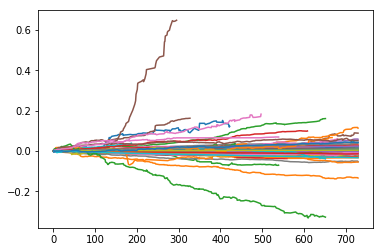

In [27]:
for i, (idVal, dfG) in enumerate(df[['Stock', 'Day', 'y']].groupby('Stock')):
    if i > 100: continue
    df1 = dfG[['Day', 'y']].groupby('Day').agg(np.mean).reset_index()
    plt.plot(df1['Day'], np.cumsum(df1['y']),label='%d'%idVal)

The stocks are not present every day. They can come and go...

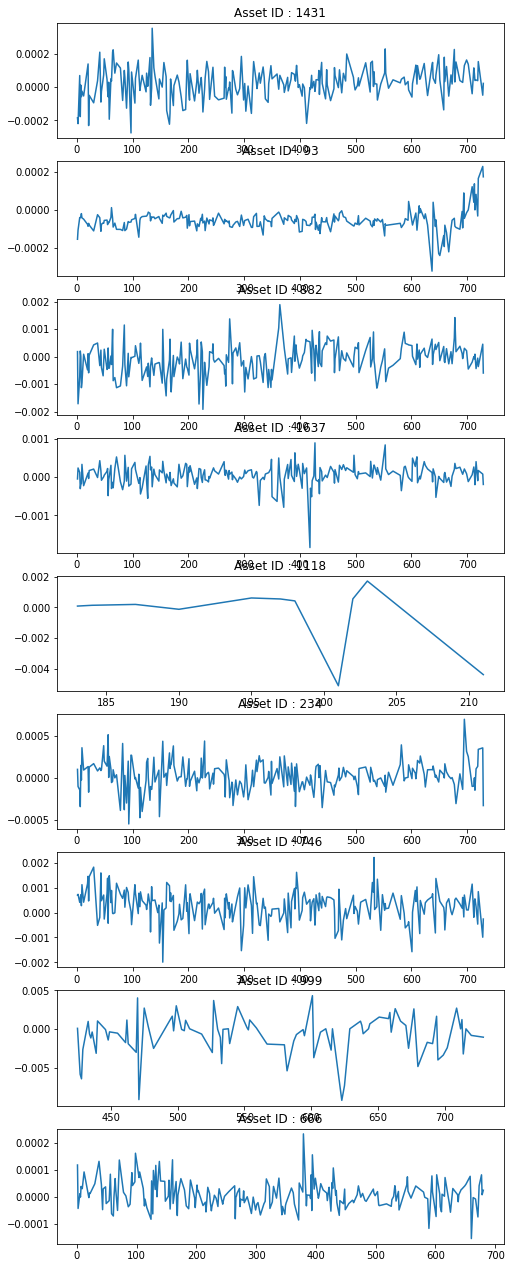

In [28]:
# Example of y values to some stocks
id_to_use = [1431, 93, 882, 1637, 1118, 234, 746, 999, 666]
fig = plt.figure(figsize=(8, 25))
plot_count = 0
for id_val in id_to_use:
    plot_count += 1
    plt.subplot(10, 1, plot_count)
    temp_df = df[df['Stock'] == id_val]
    plt.plot(temp_df.Day.values, temp_df.y.values)
    plt.title("Asset ID : "+str(id_val))
plt.show()

Text(0,0.5,'portfolio size')

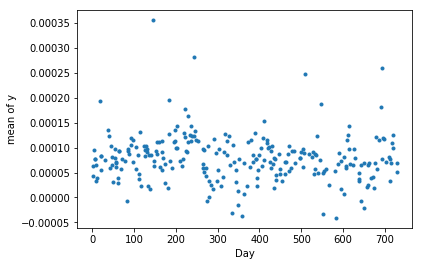

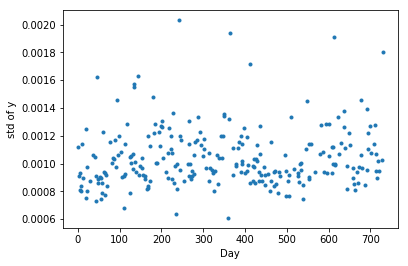

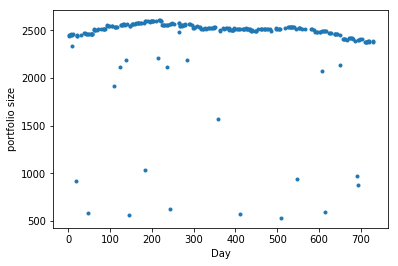

In [29]:
market_df = df[['Day', 'y']].groupby('Day').agg([np.mean, np.std, len]).reset_index()
t      = market_df['Day']
y_mean = np.array(market_df['y']['mean'])
y_std  = np.array(market_df['y']['std'])
n      = np.array(market_df['y']['len'])

plt.figure()
plt.plot(t, y_mean, '.')
plt.xlabel('Day')
plt.ylabel('mean of y')

plt.figure()
plt.plot(t, y_std, '.')
plt.xlabel('Day')
plt.ylabel('std of y')

plt.figure()
plt.plot(t, n, '.')
plt.xlabel('Day')
plt.ylabel('portfolio size')

portfolio mean periodic return: 0.01054461641562332
portfolio std dev of periodic returns: 0.005906189152162242


Text(0,0.5,'portfolio value')

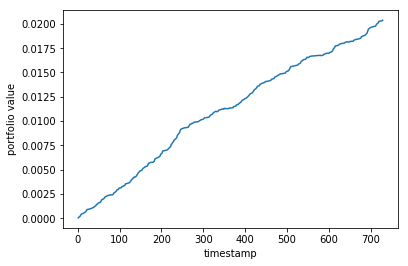

In [30]:
simple_ret = y_mean # this is a vector of the mean of asset returns for each timestamp
cum_ret = np.log(1+simple_ret).cumsum()

portfolio_mean = np.mean(cum_ret)
portfolio_std = np.std(cum_ret)
print("portfolio mean periodic return: " + str(portfolio_mean))
print("portfolio std dev of periodic returns: " + str(portfolio_std))

plt.figure()
plt.plot(t, cum_ret)
plt.xlabel('timestamp')
plt.ylabel('portfolio value')

# Weight

Target value min 0.003 max 694.002 mean 14.723 std 24.391


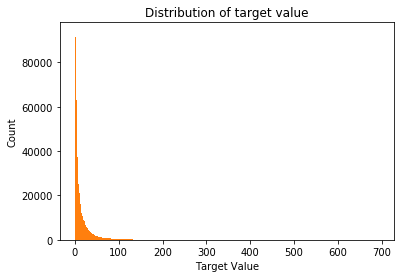

In [31]:
y = df['Weight'].values
plt.hist(y, bins=500, color=p[1])
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.title('Distribution of target value')
print('Target value min {0:.3f} max {1:.3f} mean {2:.3f} std {3:.3f}'.format(np.min(y), np.max(y), np.mean(y), np.std(y)))

# Market

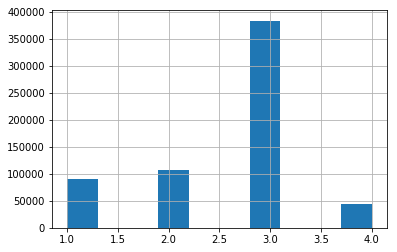

In [32]:
df['Market'].hist()

/home/bukosabino/projects/machine-learning/financial-forecasting-challenge-gresearch/env/lib/python3.5/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/bukosabino/projects/machine-learning/financial-forecasting-challenge-gresearch/env/lib/python3.5/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


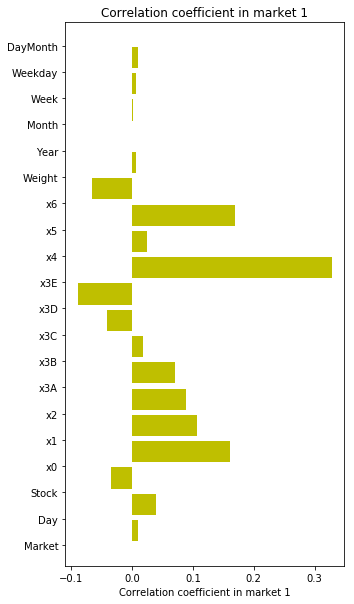

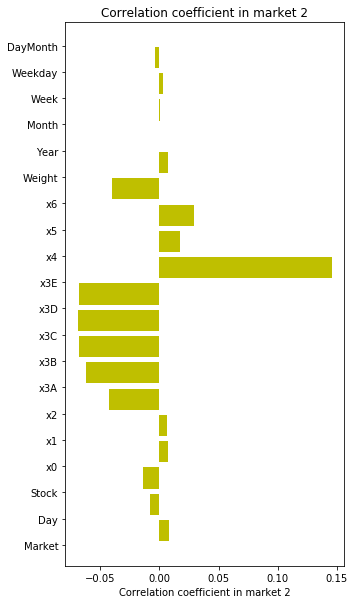

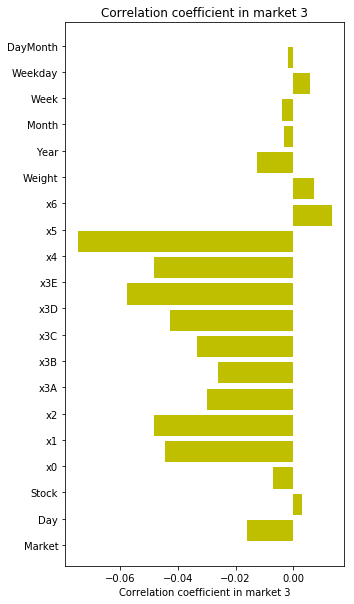

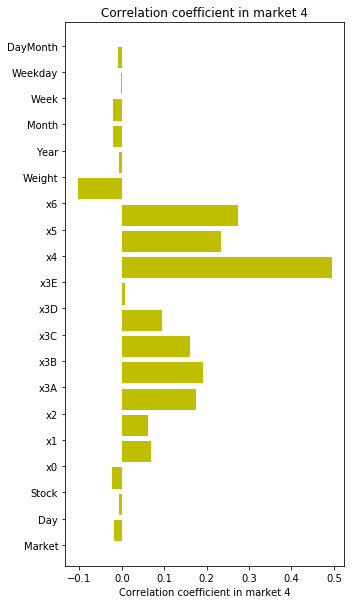

In [33]:
for idx in [1,2,3,4]:
    df_temp = df[df['Market'] == idx]

    # Now let us look at the correlation coefficient of each of these variables
    x_cols = [col for col in df.columns if col not in ['id','Date','y']]

    labels = []
    values = []
    for col in x_cols:
        labels.append(col)
        values.append(np.corrcoef(df_temp[col].values, df_temp.y.values)[0,1])

    ind = np.arange(len(labels))
    width = 0.9
    fig, ax = plt.subplots(figsize=(5,10))
    rects = ax.barh(ind, np.array(values), color='y')
    ax.set_yticks(ind+((width)/2.))
    ax.set_yticklabels(labels, rotation='horizontal')
    ax.set_xlabel("Correlation coefficient in market " + str(idx))
    ax.set_title("Correlation coefficient in market " + str(idx))
    plt.show()

Market 3 is really different to markets 1, 2 and 4. You can check correlation of x4 feature...

# Visualizing some features

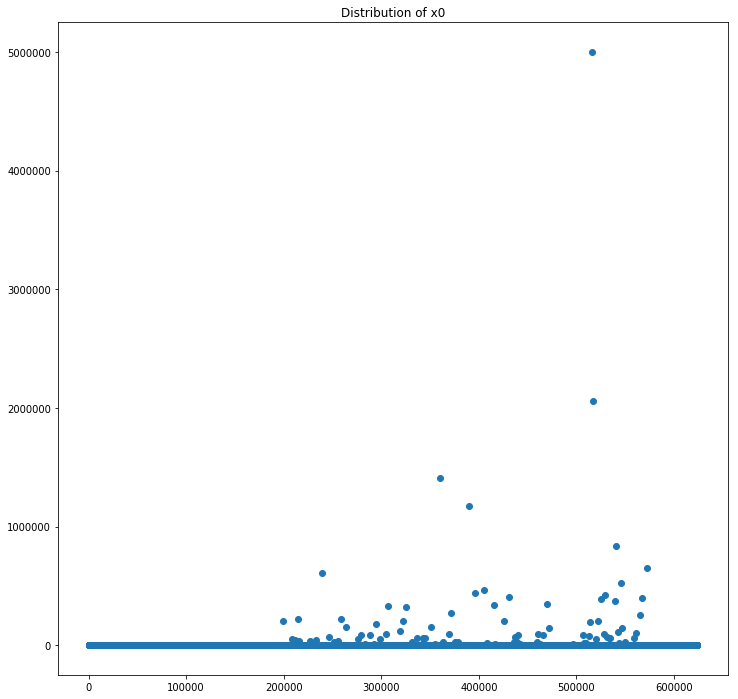

In [34]:
fig = plt.figure(figsize=(12, 12))
plt.scatter(range(df.shape[0]), df['x0'].values)
plt.title("Distribution of x0")
plt.show()

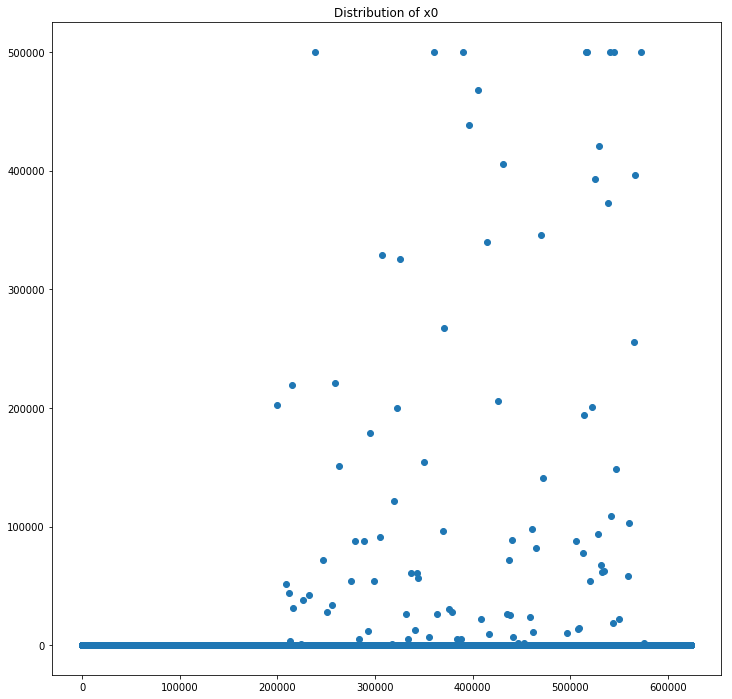

In [35]:
fig = plt.figure(figsize=(12, 12))
plt.scatter(range(df.shape[0]), df['x0'].clip(0, 500000).values)
plt.title("Distribution of x0")
plt.show()

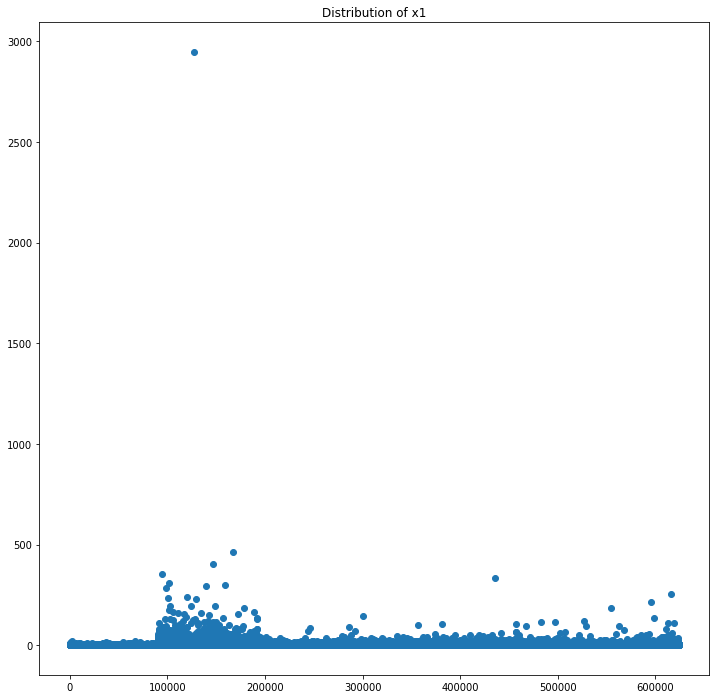

In [36]:
fig = plt.figure(figsize=(12, 12))
plt.scatter(range(df.shape[0]), df['x1'].values)
plt.title("Distribution of x1")
plt.show()

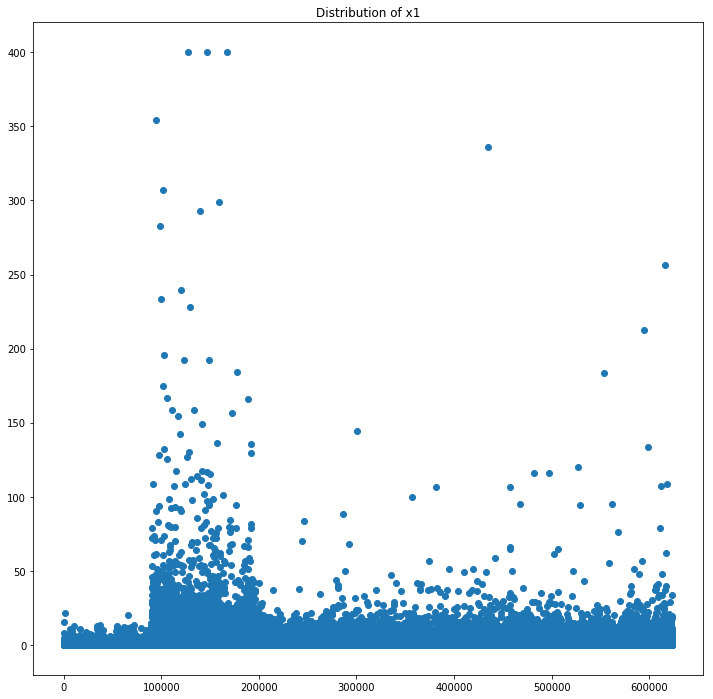

In [37]:
fig = plt.figure(figsize=(12, 12))
plt.scatter(range(df.shape[0]), df['x1'].clip(0, 400).values)
plt.title("Distribution of x1")
plt.show()

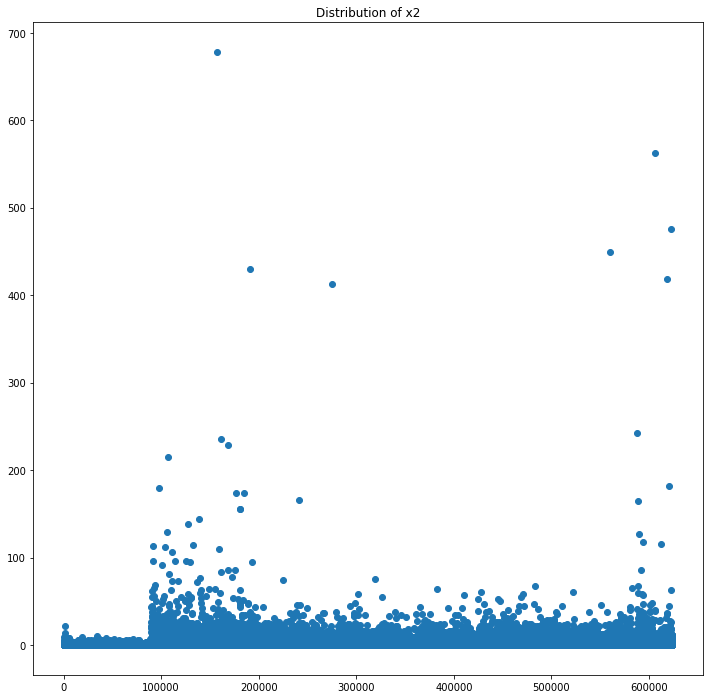

In [38]:
fig = plt.figure(figsize=(12, 12))
plt.scatter(range(df.shape[0]), df['x2'].values)
plt.title("Distribution of x2")
plt.show()

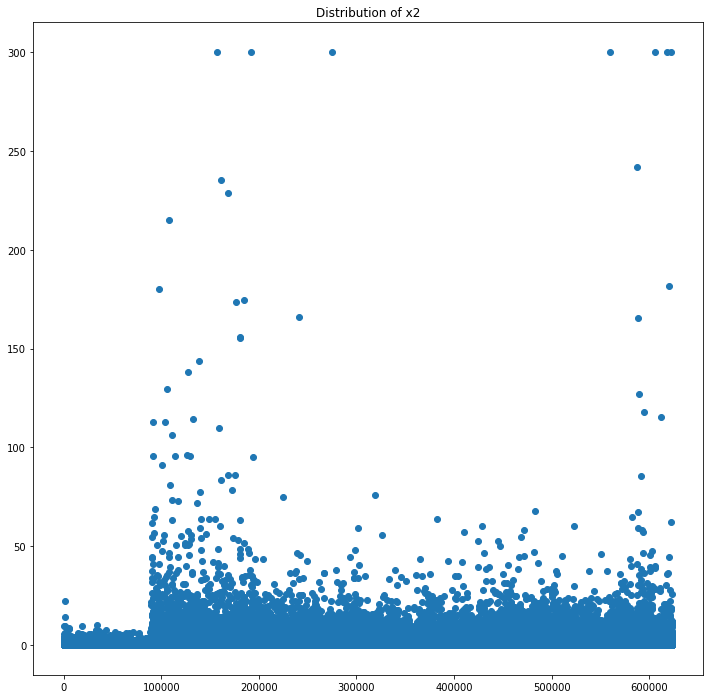

In [39]:
fig = plt.figure(figsize=(12, 12))
plt.scatter(range(df.shape[0]), df['x2'].clip(0, 300).values)
plt.title("Distribution of x2")
plt.show()

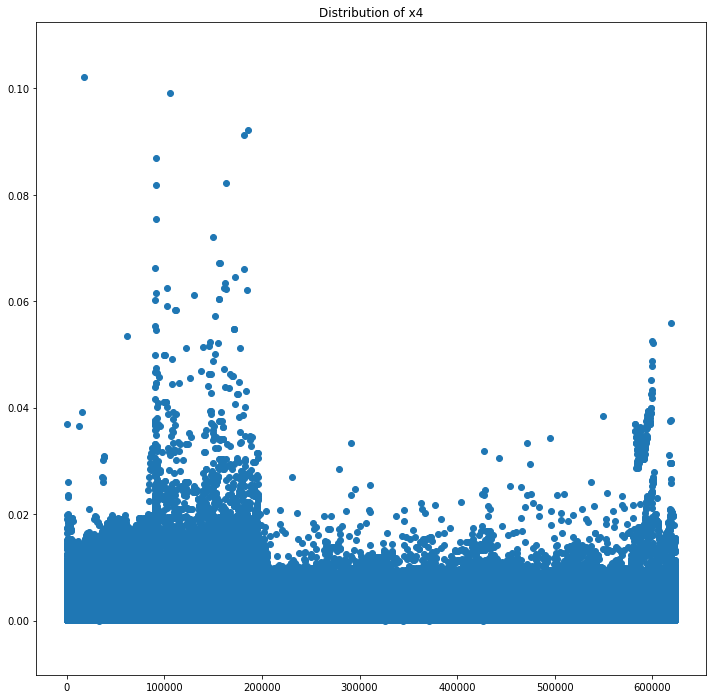

In [40]:
fig = plt.figure(figsize=(12, 12))
plt.scatter(range(df.shape[0]), df['x4'].values)
plt.title("Distribution of x4")
plt.show()

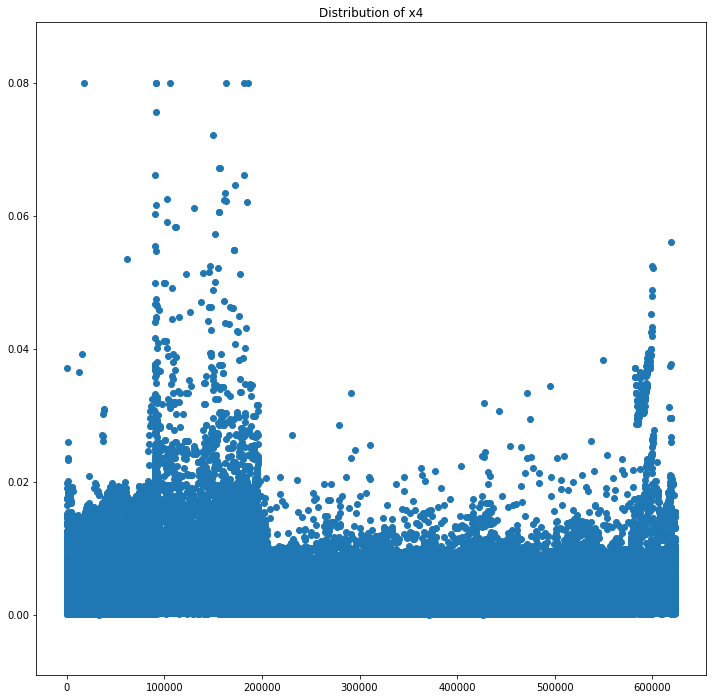

In [41]:
fig = plt.figure(figsize=(12, 12))
plt.scatter(range(df.shape[0]), df['x4'].clip(0, 0.08).values)
plt.title("Distribution of x4")
plt.show()

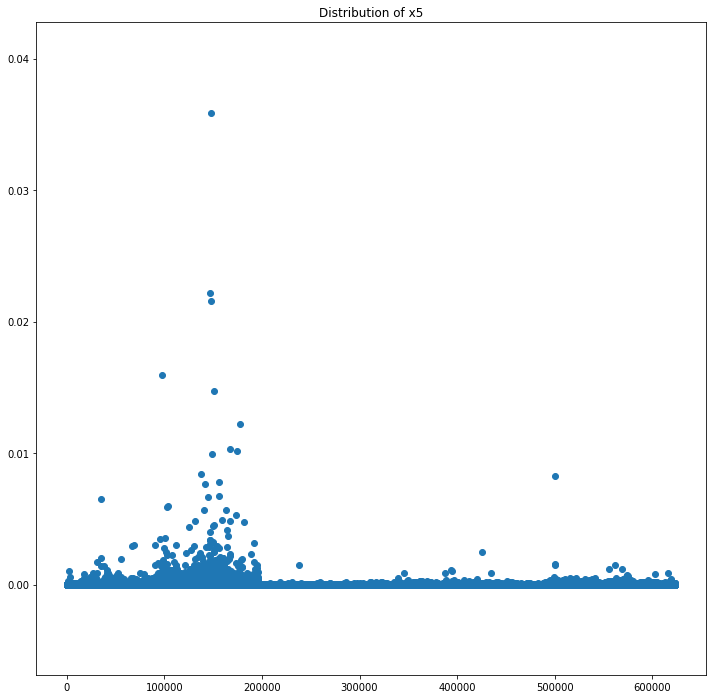

In [42]:
fig = plt.figure(figsize=(12, 12))
plt.scatter(range(df.shape[0]), df['x5'].values)
plt.title("Distribution of x5")
plt.show()

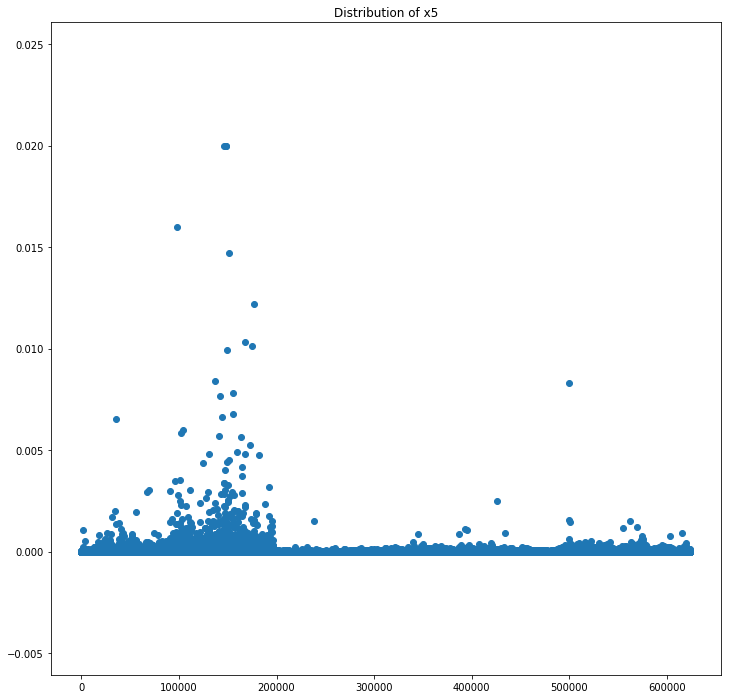

In [43]:
fig = plt.figure(figsize=(12, 12))
plt.scatter(range(df.shape[0]), df['x5'].clip(0, 0.02).values)
plt.title("Distribution of x5")
plt.show()

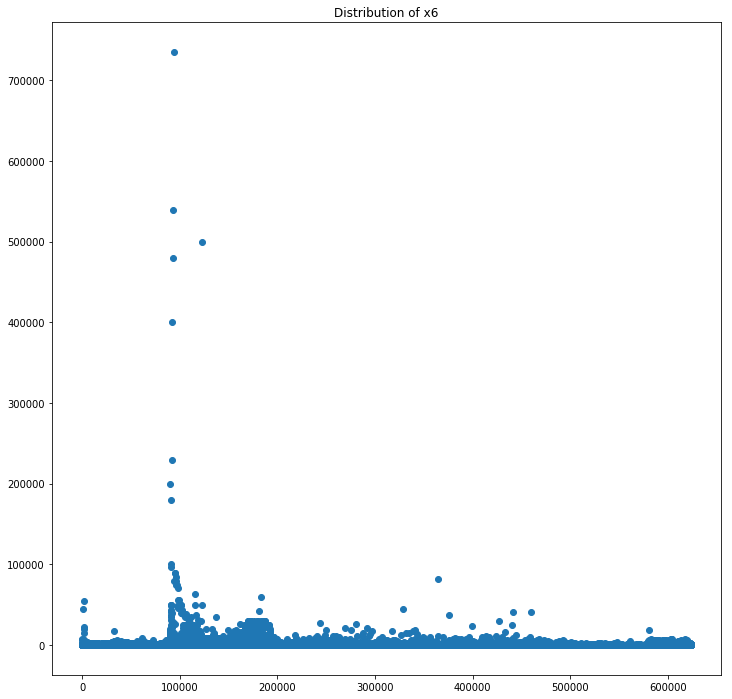

In [44]:
fig = plt.figure(figsize=(12, 12))
plt.scatter(range(df.shape[0]), df['x6'].values)
plt.title("Distribution of x6")
plt.show()

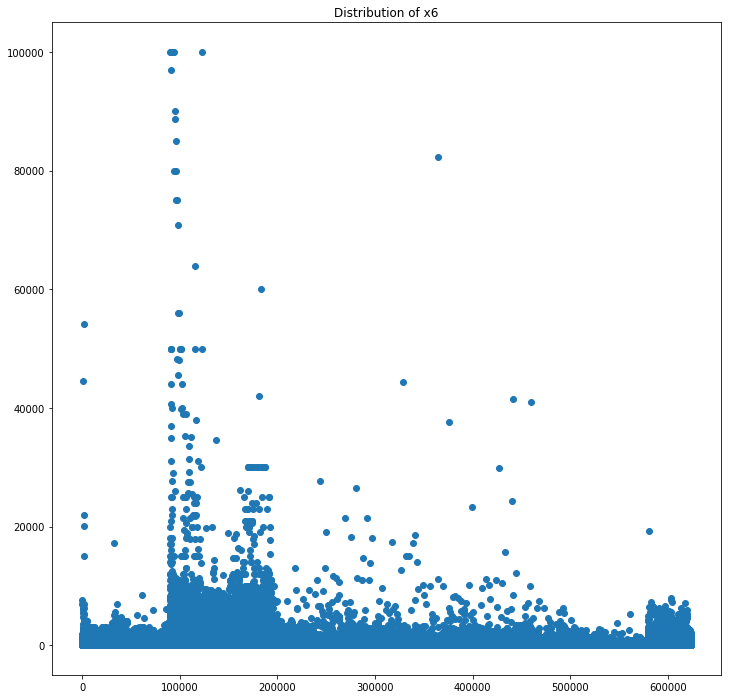

In [45]:
fig = plt.figure(figsize=(12, 12))
plt.scatter(range(df.shape[0]), df['x6'].clip(0, 100000).values)
plt.title("Distribution of x6")
plt.show()